## Load Packages

In [330]:
# for data prepartion and simple visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import datetime

In [331]:
# install xgboost package
! pip install xgboost

In [332]:
# for machine learning
from sklearn import cluster
import scipy
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
print(xgboost.__version__)

1.4.2


In [333]:
pd.set_option('display.max_columns', 55)

## Data Preparation and EDA

In [334]:
# import traffic station characteristics
traffic_station_df = pd.read_csv(os.getcwd()+'/input/dot_traffic_stations_2015.txt.gz',
                                 header=0, sep=',', quotechar='"')

# import traffic volume metrics associated to each traffic station
traffic_df = pd.read_csv(os.getcwd()+'/input/dot_traffic_2015.txt.gz',
                         header=0, sep=',', quotechar='"')

In [335]:
traffic_df.shape

(7140391, 38)

In [336]:
traffic_station_df.shape

(28466, 55)

In [337]:
traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15


In [338]:
traffic_station_df.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

In [339]:
# rename to shorten variable name
traffic_df.rename(columns = {"traffic_volume_counted_after_0000_to_0100": "vol_0000_to_0100",
                             "traffic_volume_counted_after_0100_to_0200": "vol_0100_to_0200",
                             "traffic_volume_counted_after_0200_to_0300": "vol_0200_to_0300",
                             "traffic_volume_counted_after_0300_to_0400": "vol_0300_to_0400",
                             "traffic_volume_counted_after_0400_to_0500": "vol_0400_to_0500",
                             "traffic_volume_counted_after_0500_to_0600": "vol_0500_to_0600",
                             "traffic_volume_counted_after_0600_to_0700": "vol_0600_to_0700",
                             "traffic_volume_counted_after_0700_to_0800": "vol_0700_to_0800",
                             "traffic_volume_counted_after_0800_to_0900": "vol_0800_to_0900",
                             "traffic_volume_counted_after_0900_to_1000": "vol_0900_to_1000",
                             "traffic_volume_counted_after_1000_to_1100": "vol_1000_to_1100",
                             "traffic_volume_counted_after_1100_to_1200": "vol_1100_to_1200",
                             "traffic_volume_counted_after_1200_to_1300": "vol_1200_to_1300",
                             "traffic_volume_counted_after_1300_to_1400": "vol_1300_to_1400",
                             "traffic_volume_counted_after_1400_to_1500": "vol_1400_to_1500",
                             "traffic_volume_counted_after_1500_to_1600": "vol_1500_to_1600",
                             "traffic_volume_counted_after_1600_to_1700": "vol_1600_to_1700",
                             "traffic_volume_counted_after_1700_to_1800": "vol_1700_to_1800",
                             "traffic_volume_counted_after_1800_to_1900": "vol_1800_to_1900",
                             "traffic_volume_counted_after_1900_to_2000": "vol_1900_to_2000",
                             "traffic_volume_counted_after_2000_to_2100": "vol_2000_to_2100",
                             "traffic_volume_counted_after_2100_to_2200": "vol_2100_to_2200",
                             "traffic_volume_counted_after_2200_to_2300": "vol_2200_to_2300",
                             "traffic_volume_counted_after_2300_to_2400": "vol_2300_to_2400"
                            }, inplace = True)

In [340]:
# sum to find total volume of traffic per day
traffic_df['total_traffic_vol'] = traffic_df["vol_0000_to_0100"] + traffic_df["vol_0100_to_0200"] + traffic_df["vol_0200_to_0300"] + traffic_df["vol_0300_to_0400"] + traffic_df["vol_0400_to_0500"] + traffic_df["vol_0500_to_0600"] + traffic_df["vol_0600_to_0700"] + traffic_df["vol_0700_to_0800"] + traffic_df["vol_0800_to_0900"] + traffic_df["vol_0900_to_1000"] + traffic_df["vol_1000_to_1100"] + traffic_df["vol_1100_to_1200"] + traffic_df["vol_1200_to_1300"] + traffic_df["vol_1300_to_1400"] + traffic_df["vol_1400_to_1500"] + traffic_df["vol_1500_to_1600"] + traffic_df["vol_1600_to_1700"] + traffic_df["vol_1700_to_1800"] + traffic_df["vol_1800_to_1900"] + traffic_df["vol_1900_to_2000"] + traffic_df["vol_2000_to_2100"] + traffic_df["vol_2100_to_2200"] + traffic_df["vol_2200_to_2300"] + traffic_df["vol_2300_to_2400"]
traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,vol_0000_to_0100,vol_0100_to_0200,vol_0200_to_0300,vol_0300_to_0400,vol_0400_to_0500,vol_0500_to_0600,vol_0600_to_0700,vol_0700_to_0800,vol_0800_to_0900,vol_0900_to_1000,vol_1000_to_1100,vol_1100_to_1200,vol_1200_to_1300,vol_1300_to_1400,vol_1400_to_1500,vol_1500_to_1600,vol_1600_to_1700,vol_1700_to_1800,vol_1800_to_1900,vol_1900_to_2000,vol_2000_to_2100,vol_2100_to_2200,vol_2200_to_2300,vol_2300_to_2400,year_of_data,total_traffic_vol
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15,2042
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15,20818
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15,71842
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15,12349
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15,1001


In [341]:
# null values in each col
traffic_df.isnull().sum()

date                                    0
day_of_data                             0
day_of_week                             0
direction_of_travel                     0
direction_of_travel_name                0
fips_state_code                         0
functional_classification               0
functional_classification_name          0
lane_of_travel                          0
month_of_data                           0
record_type                             0
restrictions                      7140391
station_id                              0
vol_0000_to_0100                        0
vol_0100_to_0200                        0
vol_0200_to_0300                        0
vol_0300_to_0400                        0
vol_0400_to_0500                        0
vol_0500_to_0600                        0
vol_0600_to_0700                        0
vol_0700_to_0800                        0
vol_0800_to_0900                        0
vol_0900_to_1000                        0
vol_1000_to_1100                  

In [342]:
# null values in each col
traffic_station_df.isnull().sum()

algorithm_of_vehicle_classification                  9890
algorithm_of_vehicle_classification_name            11131
calibration_of_weighing_system                      20301
calibration_of_weighing_system_name                 21785
classification_system_for_vehicle_classification        0
concurrent_route_signing                                0
concurrent_signed_route_number                      14874
direction_of_travel                                     0
direction_of_travel_name                                0
fips_county_code                                        0
fips_state_code                                         0
functional_classification                               0
functional_classification_name                          0
hpms_sample_identifier                              15248
hpms_sample_type                                        0
lane_of_travel                                          0
lane_of_travel_name                                     0
latitude      

array([[<AxesSubplot:title={'center':'day_of_data'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'direction_of_travel'}>,
        <AxesSubplot:title={'center':'fips_state_code'}>,
        <AxesSubplot:title={'center':'lane_of_travel'}>,
        <AxesSubplot:title={'center':'month_of_data'}>],
       [<AxesSubplot:title={'center':'record_type'}>,
        <AxesSubplot:title={'center':'restrictions'}>,
        <AxesSubplot:title={'center':'vol_0000_to_0100'}>,
        <AxesSubplot:title={'center':'vol_0100_to_0200'}>,
        <AxesSubplot:title={'center':'vol_0200_to_0300'}>,
        <AxesSubplot:title={'center':'vol_0300_to_0400'}>],
       [<AxesSubplot:title={'center':'vol_0400_to_0500'}>,
        <AxesSubplot:title={'center':'vol_0500_to_0600'}>,
        <AxesSubplot:title={'center':'vol_0600_to_0700'}>,
        <AxesSubplot:title={'center':'vol_0700_to_0800'}>,
        <AxesSubplot:title={'center':'vol_0800_to_0900'}>,
        <AxesSubp

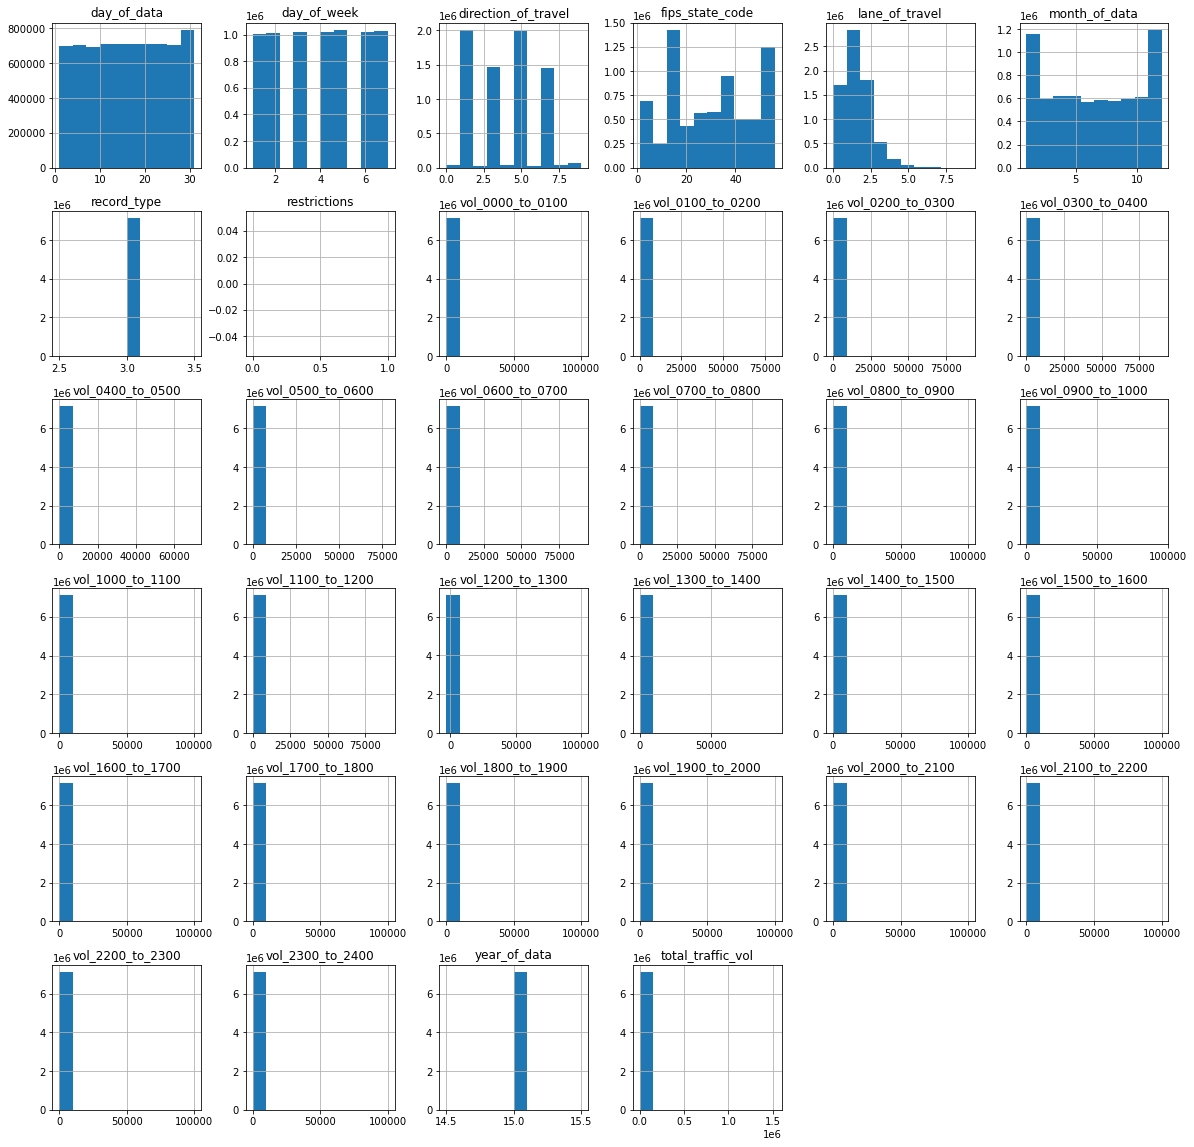

In [344]:
# visualize numeric cols distributions
traffic_df.hist(figsize = (20, 20))

array([[<AxesSubplot:title={'center':'classification_system_for_vehicle_classification'}>,
        <AxesSubplot:title={'center':'concurrent_route_signing'}>,
        <AxesSubplot:title={'center':'direction_of_travel'}>,
        <AxesSubplot:title={'center':'fips_county_code'}>,
        <AxesSubplot:title={'center':'fips_state_code'}>],
       [<AxesSubplot:title={'center':'lane_of_travel'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lrs_location_point'}>,
        <AxesSubplot:title={'center':'method_of_data_retrieval'}>],
       [<AxesSubplot:title={'center':'method_of_traffic_volume_counting'}>,
        <AxesSubplot:title={'center':'method_of_truck_weighing'}>,
        <AxesSubplot:title={'center':'method_of_vehicle_classification'}>,
        <AxesSubplot:title={'center':'number_of_lanes_in_direction_indicated'}>,
        <AxesSubplot:title={'center':'number_of_lanes_monitored_for_traffi

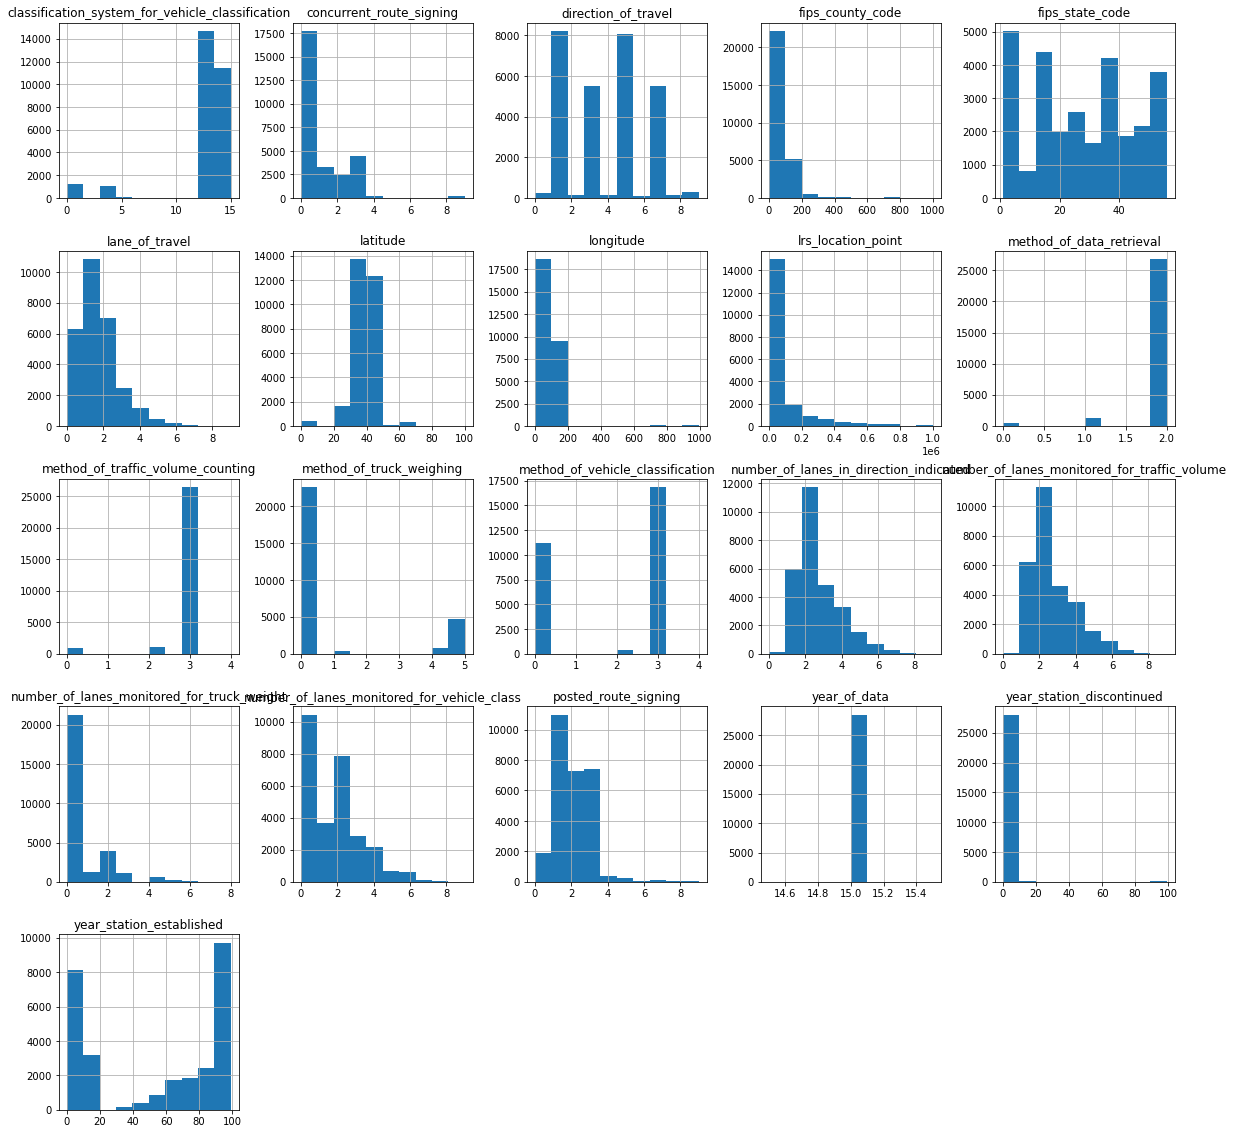

In [345]:
# visualize numeric cols distributions
traffic_station_df.hist(figsize = (20, 20))

## 1: Impact of US Holidays & Observances on Daily Traffic Volume

When looking at US traffic data for the first time, I can't help but think about all the times that hollywood movies had featured scenes of family navigating through long hours of traffic jams during holiday seasons. Therefore, for my first analysis I decided to test my hypothesis that a spike in daily traffic volume is largely caused by holiday seasons. This was done with the help of additional online data source (https://www.timeanddate.com/holidays/us/2015?hol=25).

In [346]:
# data preprocessing
df1 = pd.concat([traffic_df.iloc[:,0], traffic_df.iloc[:,13:]], axis=1, join="inner")
df1 = df1.drop(columns=['year_of_data'])
df1 = df1.groupby(by=["date"], as_index=False).sum()
df1

,date,vol_0000_to_0100,vol_0100_to_0200,vol_0200_to_0300,vol_0300_to_0400,vol_0400_to_0500,vol_0500_to_0600,vol_0600_to_0700,vol_0700_to_0800,vol_0800_to_0900,vol_0900_to_1000,vol_1000_to_1100,vol_1100_to_1200,vol_1200_to_1300,vol_1300_to_1400,vol_1400_to_1500,vol_1500_to_1600,vol_1600_to_1700,vol_1700_to_1800,vol_1800_to_1900,vol_1900_to_2000,vol_2000_to_2100,vol_2100_to_2200,vol_2200_to_2300,vol_2300_to_2400,total_traffic_vol
0,2015-01-01,3223576,3181872,2223664,1575072,1239528,1439760,2031303,2500735,3387267,4676215,6406638,8233458,9175794,9749261,9983020,9882681,9545403,8820429,7736599,6381873,5312341,4539452,3919722,2886716,128052379
1,2015-01-02,1610246,1217518,1009195,1111719,1763394,3573933,6380159,8984543,9437511,9923855,11386417,12646355,13439660,13851939,14523395,15008699,15064688,14455224,11640016,9024410,7458470,6374717,5340897,4030416,199257376
2,2015-01-03,2577595,1825768,1455633,1316807,1542949,2250677,3453902,4773896,6416513,8355406,10188223,11552043,12341919,12398395,12400808,12417839,12085252,11208297,10069097,8174116,6714904,6010771,5220084,3976941,168727835
3,2015-01-04,2453194,1787680,1364075,1073599,1142533,1614966,2395067,3274791,4621344,6524587,8465272,9773415,11226019,11658947,11763580,11585401,11068517,10103532,8735058,7076017,5986404,4740410,3696621,2625419,144756448
4,2015-01-05,1465199,1022522,898255,1104483,2230505,5124057,9420121,12786833,11690509,9921969,9925694,10194315,10678178,11096141,12122289,13579024,14592689,14653304,10961416,7795879,5945410,4998290,3832536,3261052,189300670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2746432,1958019,1614357,1346980,1413870,1946702,2842151,3841742,5529217,8067908,10506425,11973228,13091567,13008650,12820827,12582825,12413939,11728202,10367385,8574065,7025073,5687269,4352633,3056108,168495574
361,2015-12-28,2026581,1445499,1217811,1388296,2410563,5038825,8313180,10492829,10391300,10426716,11063811,12373206,12841711,13033877,13575288,14256048,14503034,13686523,10364570,7636341,6044691,5120364,3993751,2812931,194457746
362,2015-12-29,1879321,1384483,1217424,1388979,2316712,4762246,7986529,10280653,10208252,10192247,10888697,11803840,12392112,12645705,12548751,13738041,14644379,14114836,10928467,8191586,6512636,5610674,4426930,3102064,193165564
363,2015-12-30,2099643,1511422,1314564,1463601,2403055,4888793,8275262,10690800,10730065,10834819,11632698,12741718,13306528,13612574,14270295,14988696,15311121,14648317,11666444,8884863,7246736,6238423,4824663,3463416,207048516


In [347]:
# import holidays and some observances
holiday_df = pd.read_csv(os.getcwd()+'/input/Holidays and Observances in United States in 2015.csv')
holiday_df.head()

,Date,Day,Name,Type
0,1/1/2015,Thursday,New Year's Day,Federal Holiday
1,19/1/2015,Monday,Martin Luther King Jr. Day,Federal Holiday
2,14/2/2015,Saturday,Valentine's Day,Observance
3,16/2/2015,Monday,Presidents' Day,Federal Holiday
4,17/3/2015,Tuesday,St. Patrick's Day,"Observance, Christian"


In [348]:
# convert date col to list with datetime format
holiday_df["Date"] = pd.to_datetime(holiday_df["Date"])
holiday_dates = holiday_df["Date"].to_list()
holiday_list = []
for day in holiday_dates:
    holiday_list.append(day.strftime("20%y-%m-%d"))

In [349]:
# add new blank col for Y/N Holiday Date
df1['is_holiday'] = np.nan

# add data according to list
for index, row in df1.iterrows():
    date = row['date']
    if date in holiday_list:
        df1.loc[index, 'is_holiday'] = 'Y'
    else:
        df1.loc[index, 'is_holiday'] = 'N'
df1

,date,vol_0000_to_0100,vol_0100_to_0200,vol_0200_to_0300,vol_0300_to_0400,vol_0400_to_0500,vol_0500_to_0600,vol_0600_to_0700,vol_0700_to_0800,vol_0800_to_0900,vol_0900_to_1000,vol_1000_to_1100,vol_1100_to_1200,vol_1200_to_1300,vol_1300_to_1400,vol_1400_to_1500,vol_1500_to_1600,vol_1600_to_1700,vol_1700_to_1800,vol_1800_to_1900,vol_1900_to_2000,vol_2000_to_2100,vol_2100_to_2200,vol_2200_to_2300,vol_2300_to_2400,total_traffic_vol,is_holiday
0,2015-01-01,3223576,3181872,2223664,1575072,1239528,1439760,2031303,2500735,3387267,4676215,6406638,8233458,9175794,9749261,9983020,9882681,9545403,8820429,7736599,6381873,5312341,4539452,3919722,2886716,128052379,Y
1,2015-01-02,1610246,1217518,1009195,1111719,1763394,3573933,6380159,8984543,9437511,9923855,11386417,12646355,13439660,13851939,14523395,15008699,15064688,14455224,11640016,9024410,7458470,6374717,5340897,4030416,199257376,N
2,2015-01-03,2577595,1825768,1455633,1316807,1542949,2250677,3453902,4773896,6416513,8355406,10188223,11552043,12341919,12398395,12400808,12417839,12085252,11208297,10069097,8174116,6714904,6010771,5220084,3976941,168727835,N
3,2015-01-04,2453194,1787680,1364075,1073599,1142533,1614966,2395067,3274791,4621344,6524587,8465272,9773415,11226019,11658947,11763580,11585401,11068517,10103532,8735058,7076017,5986404,4740410,3696621,2625419,144756448,N
4,2015-01-05,1465199,1022522,898255,1104483,2230505,5124057,9420121,12786833,11690509,9921969,9925694,10194315,10678178,11096141,12122289,13579024,14592689,14653304,10961416,7795879,5945410,4998290,3832536,3261052,189300670,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2746432,1958019,1614357,1346980,1413870,1946702,2842151,3841742,5529217,8067908,10506425,11973228,13091567,13008650,12820827,12582825,12413939,11728202,10367385,8574065,7025073,5687269,4352633,3056108,168495574,N
361,2015-12-28,2026581,1445499,1217811,1388296,2410563,5038825,8313180,10492829,10391300,10426716,11063811,12373206,12841711,13033877,13575288,14256048,14503034,13686523,10364570,7636341,6044691,5120364,3993751,2812931,194457746,N
362,2015-12-29,1879321,1384483,1217424,1388979,2316712,4762246,7986529,10280653,10208252,10192247,10888697,11803840,12392112,12645705,12548751,13738041,14644379,14114836,10928467,8191586,6512636,5610674,4426930,3102064,193165564,N
363,2015-12-30,2099643,1511422,1314564,1463601,2403055,4888793,8275262,10690800,10730065,10834819,11632698,12741718,13306528,13612574,14270295,14988696,15311121,14648317,11666444,8884863,7246736,6238423,4824663,3463416,207048516,N


In [20]:
# export data for Tableau visualization
# df1.to_csv("traffic_vol_by_date_v1.csv")

![alt text](Insight_1a.png "Insight 1a")

### Insight 1a:
Each data point denotes the traffic volume observed on the specific day in 2015. After plotting the average line, I observe that there were no significance in holiday dates affecting the traffic volume as seen from the distribution of 'Y' (orange) points in the Tableau chart above. Therefore, i decided to expand the number of highlighted points to days around the holiday date, specifically +/- 1 day (i.e, for Christmas Day - 24th Dec and 26th Dec).

In [352]:
# Include +/- 1day from holiday dates (additional dates)
add_holiday_list = []
for day in holiday_dates:
    add_one = day + datetime.timedelta(days=1)
    minus_one = day - datetime.timedelta(days=1)
    add_holiday_list.append(add_one.strftime("20%y-%m-%d"))
    add_holiday_list.append(minus_one.strftime("20%y-%m-%d"))

In [353]:
# append new dates into df
for index, row in df1.iterrows():
    date = row['date']
    if date in add_holiday_list:
        df1.loc[index, 'is_holiday'] = '+/- 1 day'
df1

,date,vol_0000_to_0100,vol_0100_to_0200,vol_0200_to_0300,vol_0300_to_0400,vol_0400_to_0500,vol_0500_to_0600,vol_0600_to_0700,vol_0700_to_0800,vol_0800_to_0900,vol_0900_to_1000,vol_1000_to_1100,vol_1100_to_1200,vol_1200_to_1300,vol_1300_to_1400,vol_1400_to_1500,vol_1500_to_1600,vol_1600_to_1700,vol_1700_to_1800,vol_1800_to_1900,vol_1900_to_2000,vol_2000_to_2100,vol_2100_to_2200,vol_2200_to_2300,vol_2300_to_2400,total_traffic_vol,is_holiday
0,2015-01-01,3223576,3181872,2223664,1575072,1239528,1439760,2031303,2500735,3387267,4676215,6406638,8233458,9175794,9749261,9983020,9882681,9545403,8820429,7736599,6381873,5312341,4539452,3919722,2886716,128052379,Y
1,2015-01-02,1610246,1217518,1009195,1111719,1763394,3573933,6380159,8984543,9437511,9923855,11386417,12646355,13439660,13851939,14523395,15008699,15064688,14455224,11640016,9024410,7458470,6374717,5340897,4030416,199257376,+/- 1 day
2,2015-01-03,2577595,1825768,1455633,1316807,1542949,2250677,3453902,4773896,6416513,8355406,10188223,11552043,12341919,12398395,12400808,12417839,12085252,11208297,10069097,8174116,6714904,6010771,5220084,3976941,168727835,N
3,2015-01-04,2453194,1787680,1364075,1073599,1142533,1614966,2395067,3274791,4621344,6524587,8465272,9773415,11226019,11658947,11763580,11585401,11068517,10103532,8735058,7076017,5986404,4740410,3696621,2625419,144756448,N
4,2015-01-05,1465199,1022522,898255,1104483,2230505,5124057,9420121,12786833,11690509,9921969,9925694,10194315,10678178,11096141,12122289,13579024,14592689,14653304,10961416,7795879,5945410,4998290,3832536,3261052,189300670,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2746432,1958019,1614357,1346980,1413870,1946702,2842151,3841742,5529217,8067908,10506425,11973228,13091567,13008650,12820827,12582825,12413939,11728202,10367385,8574065,7025073,5687269,4352633,3056108,168495574,+/- 1 day
361,2015-12-28,2026581,1445499,1217811,1388296,2410563,5038825,8313180,10492829,10391300,10426716,11063811,12373206,12841711,13033877,13575288,14256048,14503034,13686523,10364570,7636341,6044691,5120364,3993751,2812931,194457746,N
362,2015-12-29,1879321,1384483,1217424,1388979,2316712,4762246,7986529,10280653,10208252,10192247,10888697,11803840,12392112,12645705,12548751,13738041,14644379,14114836,10928467,8191586,6512636,5610674,4426930,3102064,193165564,N
363,2015-12-30,2099643,1511422,1314564,1463601,2403055,4888793,8275262,10690800,10730065,10834819,11632698,12741718,13306528,13612574,14270295,14988696,15311121,14648317,11666444,8884863,7246736,6238423,4824663,3463416,207048516,+/- 1 day


In [354]:
# export data for Tableau visualization
# df1.to_csv("traffic_vol_by_date_v2.csv")

![alt text](Insight_1b.png "Insight 1b")

In [26]:
# drop outlier from 8th March
df1 = df1.drop(df1[df1.date == '2015-03-08'].index)

In [27]:
# avg daily total traffic vol
avg_traffic = df1['total_traffic_vol'].mean()
print("Avg Traffic Vol: " + str(avg_traffic))

# num of US holidays or +/- 1day
num_US_holiday = len(df1[df1['is_holiday'] != 'N'])
num_non_US_holiday = len(df1[df1['is_holiday'] == 'N'])

# num of US holidays or +/- 1day AND higher than avg
num_US_holiday_higher = len(df1[(df1['is_holiday'] != 'N') & (df1['total_traffic_vol'] > avg_traffic)])
num_US_holiday_lower = num_US_holiday-num_US_holiday_higher
num_non_US_holiday_higher = len(df1[(df1['is_holiday'] == 'N') & (df1['total_traffic_vol'] > avg_traffic)])
num_non_US_holiday_lower = num_non_US_holiday-num_non_US_holiday_higher

Avg Traffic Vol: 207578160.18406594


In [28]:
# Summary Table
dict1 = {'US Holiday/+- 1 Day': ['Higher than Avg', 'Lower than Avg'], 
         '# of Occurence': [num_US_holiday_higher, num_US_holiday_lower],
         '% of Total Days': [round(100 * num_US_holiday_higher/num_US_holiday,2), round(100 * num_US_holiday_lower/num_US_holiday,2)]}
table1 = pd.DataFrame(dict1).set_index('US Holiday/+- 1 Day')

dict2 = {'Non US Holiday': ['Higher than Avg', 'Lower than Avg'], 
         '# of Occurence': [num_non_US_holiday_higher, num_non_US_holiday_lower],
         '% of Total Days': [round(100 * num_non_US_holiday_higher/num_non_US_holiday,2), round(100 * num_non_US_holiday_lower/num_non_US_holiday,2)]}
table2 = pd.DataFrame(dict2).set_index('Non US Holiday')

In [356]:
# holiday dates
table1

,# of Occurence,% of Total Days
US Holiday/+- 1 Day,,
Higher than Avg,35,51.47
Lower than Avg,33,48.53


In [357]:
# non holiday dates
table2

,# of Occurence,% of Total Days
Non US Holiday,,
Higher than Avg,171,57.77
Lower than Avg,125,42.23


### Insight 1b:
However, after the additition of +/- 1 day points, there is still no obvious relationship observed between holiday dates and traffic volume. On closer look at the summary tables above, there is in fact a higher % of non-holiday dates that are above the average traffic volume (57.77%) as compared to holiday dates (51.47%). This further proves that my initial hypothesis was wrong.

## 2. Correlation between Time of Day and Daily Traffic Volume

The objective of my second analysis is to find out at which period throughtout the 24-hr cycle has the biggest impact on daily traffic volume.

In [358]:
#data preprocessing
df2 = pd.concat([traffic_df.iloc[:,0], traffic_df.iloc[:,13:]], axis=1, join="inner")
df2 = df2.drop(columns=['year_of_data'])
df2 = df2.groupby(by=["date"], as_index=False).sum()
df2

,date,vol_0000_to_0100,vol_0100_to_0200,vol_0200_to_0300,vol_0300_to_0400,vol_0400_to_0500,vol_0500_to_0600,vol_0600_to_0700,vol_0700_to_0800,vol_0800_to_0900,vol_0900_to_1000,vol_1000_to_1100,vol_1100_to_1200,vol_1200_to_1300,vol_1300_to_1400,vol_1400_to_1500,vol_1500_to_1600,vol_1600_to_1700,vol_1700_to_1800,vol_1800_to_1900,vol_1900_to_2000,vol_2000_to_2100,vol_2100_to_2200,vol_2200_to_2300,vol_2300_to_2400,total_traffic_vol
0,2015-01-01,3223576,3181872,2223664,1575072,1239528,1439760,2031303,2500735,3387267,4676215,6406638,8233458,9175794,9749261,9983020,9882681,9545403,8820429,7736599,6381873,5312341,4539452,3919722,2886716,128052379
1,2015-01-02,1610246,1217518,1009195,1111719,1763394,3573933,6380159,8984543,9437511,9923855,11386417,12646355,13439660,13851939,14523395,15008699,15064688,14455224,11640016,9024410,7458470,6374717,5340897,4030416,199257376
2,2015-01-03,2577595,1825768,1455633,1316807,1542949,2250677,3453902,4773896,6416513,8355406,10188223,11552043,12341919,12398395,12400808,12417839,12085252,11208297,10069097,8174116,6714904,6010771,5220084,3976941,168727835
3,2015-01-04,2453194,1787680,1364075,1073599,1142533,1614966,2395067,3274791,4621344,6524587,8465272,9773415,11226019,11658947,11763580,11585401,11068517,10103532,8735058,7076017,5986404,4740410,3696621,2625419,144756448
4,2015-01-05,1465199,1022522,898255,1104483,2230505,5124057,9420121,12786833,11690509,9921969,9925694,10194315,10678178,11096141,12122289,13579024,14592689,14653304,10961416,7795879,5945410,4998290,3832536,3261052,189300670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2746432,1958019,1614357,1346980,1413870,1946702,2842151,3841742,5529217,8067908,10506425,11973228,13091567,13008650,12820827,12582825,12413939,11728202,10367385,8574065,7025073,5687269,4352633,3056108,168495574
361,2015-12-28,2026581,1445499,1217811,1388296,2410563,5038825,8313180,10492829,10391300,10426716,11063811,12373206,12841711,13033877,13575288,14256048,14503034,13686523,10364570,7636341,6044691,5120364,3993751,2812931,194457746
362,2015-12-29,1879321,1384483,1217424,1388979,2316712,4762246,7986529,10280653,10208252,10192247,10888697,11803840,12392112,12645705,12548751,13738041,14644379,14114836,10928467,8191586,6512636,5610674,4426930,3102064,193165564
363,2015-12-30,2099643,1511422,1314564,1463601,2403055,4888793,8275262,10690800,10730065,10834819,11632698,12741718,13306528,13612574,14270295,14988696,15311121,14648317,11666444,8884863,7246736,6238423,4824663,3463416,207048516


,vol_0000_to_0100,vol_0100_to_0200,vol_0200_to_0300,vol_0300_to_0400,vol_0400_to_0500,vol_0500_to_0600,vol_0600_to_0700,vol_0700_to_0800,vol_0800_to_0900,vol_0900_to_1000,vol_1000_to_1100,vol_1100_to_1200,vol_1200_to_1300,vol_1300_to_1400,vol_1400_to_1500,vol_1500_to_1600,vol_1600_to_1700,vol_1700_to_1800,vol_1800_to_1900,vol_1900_to_2000,vol_2000_to_2100,vol_2100_to_2200,vol_2200_to_2300,vol_2300_to_2400,total_traffic_vol
vol_0000_to_0100,1.000000,0.974327,0.956274,0.141907,-0.699843,-0.797912,-0.816751,-0.812215,-0.733513,-0.393643,0.279665,0.498497,0.569225,0.468727,0.050605,-0.391148,-0.591728,-0.642314,-0.305758,0.182685,0.370875,0.387826,0.459592,0.433895,-0.370695
vol_0100_to_0200,0.974327,1.000000,0.971942,0.180337,-0.680379,-0.779560,-0.797724,-0.793763,-0.722320,-0.404167,0.243773,0.466117,0.540829,0.451374,0.049384,-0.379094,-0.576653,-0.628931,-0.300835,0.169920,0.349275,0.368610,0.445920,0.422931,-0.367431
vol_0200_to_0300,0.956274,0.971942,1.000000,0.345788,-0.568012,-0.684867,-0.705697,-0.698895,-0.612219,-0.261941,0.376112,0.578561,0.640501,0.559555,0.186321,-0.241199,-0.453660,-0.515465,-0.166407,0.288101,0.457825,0.486694,0.557029,0.528733,-0.221496
vol_0300_to_0400,0.141907,0.180337,0.345788,1.000000,0.564223,0.427095,0.394321,0.397514,0.491697,0.730922,0.807984,0.734052,0.655187,0.672534,0.739724,0.654552,0.542943,0.497521,0.637778,0.649804,0.656901,0.684994,0.639257,0.577093,0.743276
vol_0400_to_0500,-0.699843,-0.680379,-0.568012,0.564223,1.000000,0.983762,0.973060,0.968489,0.974937,0.878823,0.386616,0.138922,0.020250,0.107097,0.494129,0.796254,0.889984,0.908432,0.723357,0.336214,0.191060,0.169701,0.051149,0.013921,0.856938
vol_0500_to_0600,-0.797912,-0.779560,-0.684867,0.427095,0.983762,1.000000,0.997047,0.992170,0.979113,0.821228,0.256701,-0.000927,-0.111113,-0.013281,0.405644,0.758979,0.883572,0.911783,0.685724,0.256623,0.092713,0.061597,-0.063814,-0.093491,0.802920
vol_0600_to_0700,-0.816751,-0.797724,-0.705697,0.394321,0.973060,0.997047,1.000000,0.997782,0.981025,0.810055,0.229609,-0.030307,-0.136984,-0.034678,0.393514,0.758181,0.887943,0.917629,0.688170,0.251536,0.083232,0.050949,-0.076508,-0.103593,0.795838
vol_0700_to_0800,-0.812215,-0.793763,-0.698895,0.397514,0.968489,0.992170,0.997782,1.000000,0.987206,0.822619,0.245328,-0.016737,-0.125159,-0.022670,0.406978,0.769827,0.896598,0.925310,0.704119,0.270074,0.101038,0.073645,-0.051970,-0.075938,0.807627
vol_0800_to_0900,-0.733513,-0.722320,-0.612219,0.491697,0.974937,0.979113,0.981025,0.987206,1.000000,0.898398,0.376523,0.110564,-0.014319,0.075186,0.479812,0.804629,0.908612,0.931434,0.746138,0.342108,0.188689,0.178807,0.058518,0.032930,0.863178
vol_0900_to_1000,-0.393643,-0.404167,-0.261941,0.730922,0.878823,0.821228,0.810055,0.822619,0.898398,1.000000,0.737098,0.512207,0.375717,0.425471,0.703888,0.855080,0.862253,0.857050,0.819174,0.574143,0.478393,0.489815,0.381712,0.338813,0.945861


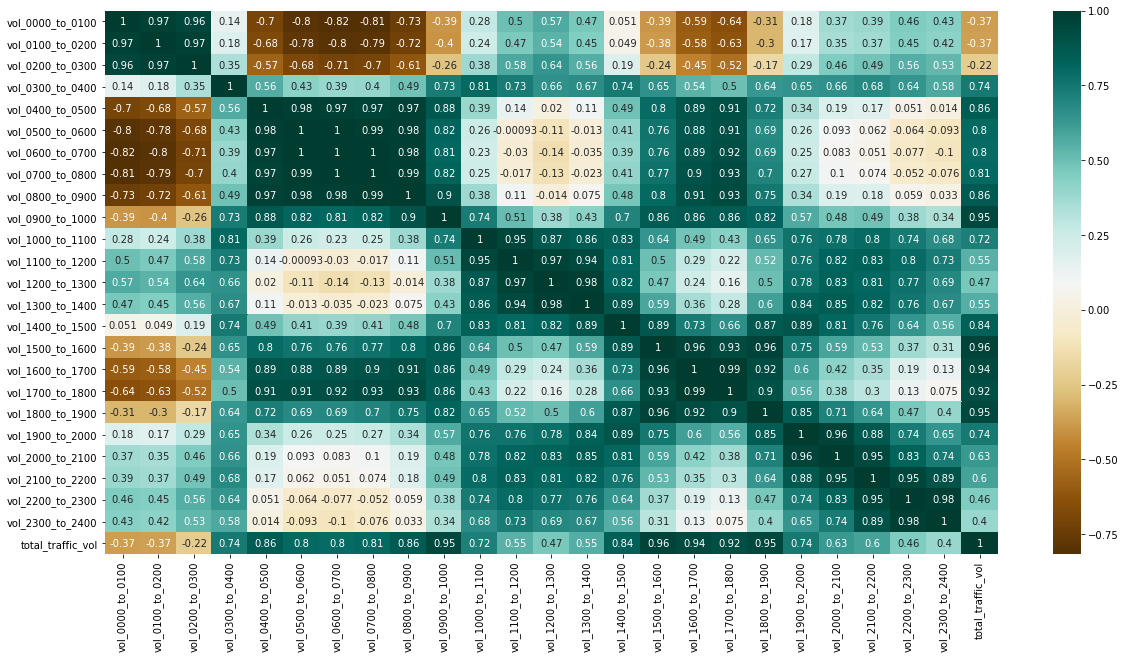

In [359]:
plt.figure(figsize=(20,10))
c= df2.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [360]:
c.sort_values(by=['total_traffic_vol'], ascending=False).loc[:,['total_traffic_vol']]

,total_traffic_vol
total_traffic_vol,1.000000
vol_1500_to_1600,0.962946
vol_1800_to_1900,0.947417
vol_0900_to_1000,0.945861
vol_1600_to_1700,0.940220
vol_1700_to_1800,0.920870
vol_0800_to_0900,0.863178
vol_0400_to_0500,0.856938
vol_1400_to_1500,0.841937
vol_0700_to_0800,0.807627


### Insight 2:
With reference from the sorted table above, I observed that the after-work rush hours has a bigger influence on overall daily traffic as compared to morning before-work periods. Out of the top 5 highest correlated values, 4/5 are periods from 1500-1900. The table then typically follows the morning rush hours, followed by the afternoon periods. I also observed that the negative correlation values are odd periods with no traffic patterns from 0000-0300.

## 3. Geometric Locations of Traffic Stations with Relation to Traffic Accidents & Fatalities

After several analysis on the traffic dataframe, I couldn't help but wonder if the traffic volume was indicative of the entire united states as there are bound to be areas that are rural where data collection might be an issue. There are a spectrum of reasons for collecting traffic data such as economic and environmental reasons (think carbon monoxideI). However the biggest reason to me is likely to decrease chances of traffic accidents and lower deaths from car crashes.

#### Therefore, my hypothesis is that the US government would place additional traffic stations in states where risk of traffic accidents are more likely to happen. 

The analysis is done using OpenStreetMap and additonal data source from National Highway Traffic Safety Administration (NHTSA) - 2015 Traffic Accident Dataset (https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=nhtsa_traffic_fatalities&page=dataset&project=ace-axon-271215&ws=!1m4!1m3!3m2!1sbigquery-public-data!2snhtsa_traffic_fatalities)

In [373]:
# start by plotting geo locations of traffic stations
# set BBox according to US map
BBox = (124.98,66.8,25.8,49.04)

In [374]:
traffic_station_df.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

In [375]:
# drop invalid longitude/latitude values
traffic_station_df2 = traffic_station_df.drop(traffic_station_df[(traffic_station_df.longitude < BBox[1]) | (traffic_station_df.longitude > BBox[0]) | (traffic_station_df.latitude < BBox[2]) | (traffic_station_df.latitude > BBox[3])].index)

#drop null
traffic_station_df2 = traffic_station_df2[traffic_station_df2['latitude'].notna()]
traffic_station_df2 = traffic_station_df2[traffic_station_df2['longitude'].notna()]
traffic_station_df2

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

In [376]:
# import map
us_map = plt.imread(os.getcwd()+'\\map.png')

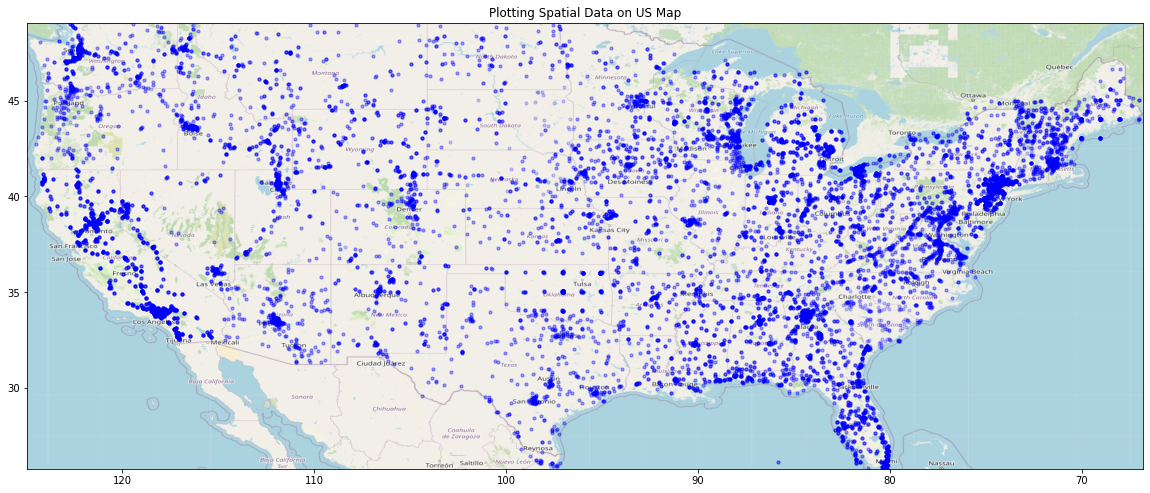

In [377]:
# Plot station geolocations
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(traffic_station_df2.longitude, traffic_station_df2.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_map, zorder=0, extent = BBox, aspect= 'equal')

#### After plotting the traffic stations, I notice there are several hot spots and wish to seggregate the map into clusters.

In [378]:
# shrink dataframe to just latitude and longitude
cluster_df = traffic_station_df2[['latitude','longitude']]

# adjust longitude values
cluster_df['longitude'] = cluster_df['longitude'].apply(lambda x: -abs(x))
cluster_df.head()

C:\Users\ngohw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,latitude,longitude
0,33.850898,-117.814391
1,37.874697,-121.219590
2,41.441777,-122.435010
3,40.516500,-111.891520
4,40.892373,-74.484206


#### KMmens Clustering

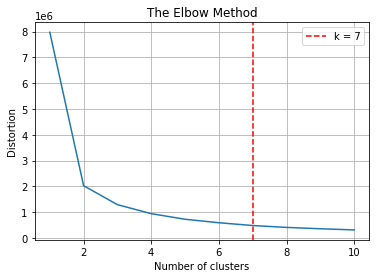

In [379]:
# locate clusters of traffic stations using Kmeans Clustering
X = cluster_df
max_k = 10

## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
    
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [380]:
# try k=7 and locate centroids
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = cluster_df

## clustering
cluster_df_X = X.copy()
cluster_df_X["cluster"] = model.fit_predict(X)

## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     cluster_df_X.drop("cluster", axis=1).values)
cluster_df_X["centroids"] = 0
for i in closest:
    cluster_df_X["centroids"].iloc[i] = 1
    
## add clustering info to the original dataset
cluster_df[["cluster","centroids"]] = cluster_df_X[["cluster","centroids"]]
cluster_df.sample(5)

C:\Users\ngohw\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\ngohw\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,latitude,longitude,cluster,centroids
23429,46.353963,-104.167798,5,0
7184,41.826400,-71.515773,3,0
23189,29.603680,-97.896360,6,0
23302,40.634107,-74.946189,3,0
14814,39.489351,-76.870479,3,0


#### "cluster" column here indicates what cluster the observation belongs to.
#### "centroids" values here equates to 1 if an observation is also the centroid (the closest to the center), 0 otherwise.

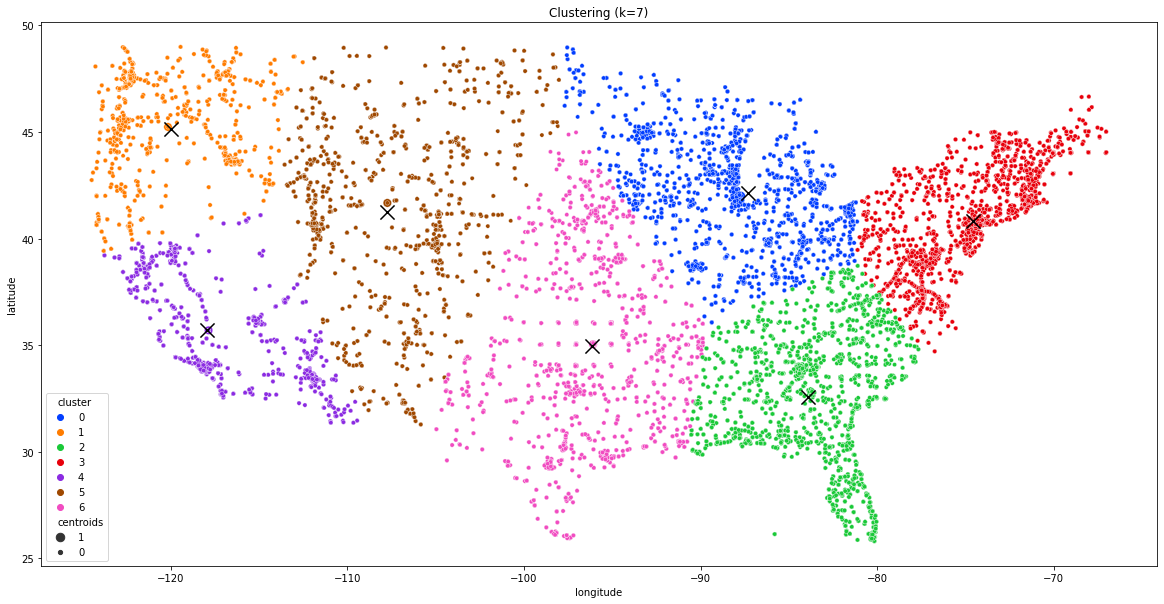

In [381]:
## plot
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x="longitude", y="latitude", data=cluster_df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title("Clustering (k=7)")
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,1], th_centroids[:,0], s=200, c='black', 
           marker="x")

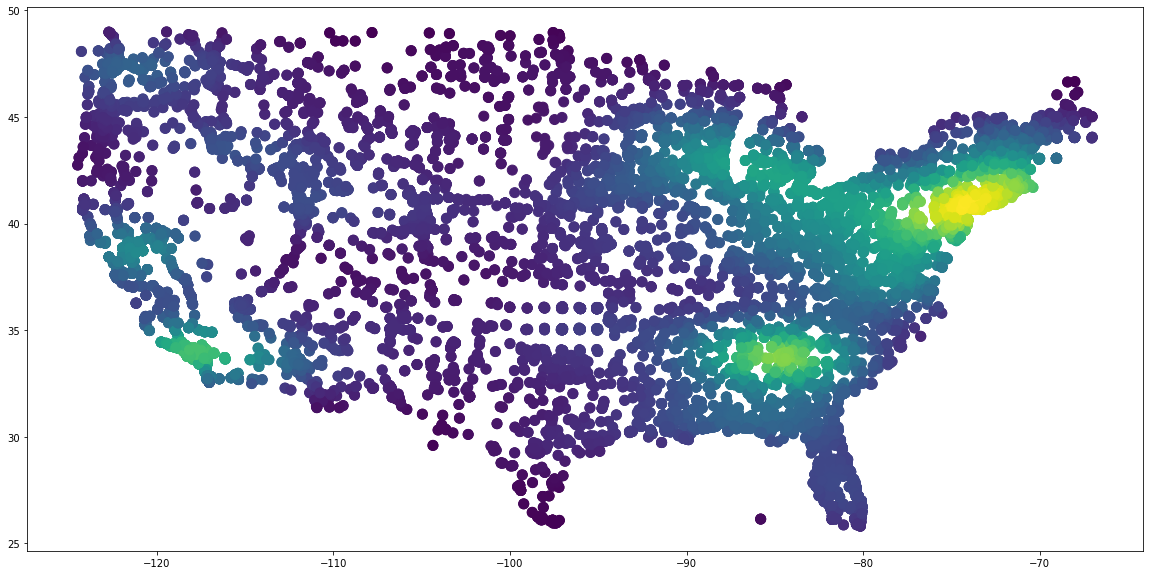

In [382]:
# plot heatmap to show density
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# input latitude, longitude geo-points
x = cluster_df['longitude']
y = cluster_df['latitude']

# calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y, c=z, s=100)
plt.show()

#### Cluster 0,1,2,3,4 can be identified from density plot with yellow and light green hues, showing high number of traffic stations located at these areas. Only cluster 5 (pink) cannot be identified.
#### After locating 'hot' zones, I wish to find out the specific states with high amount of stations using a bar chart below.

<AxesSubplot:>

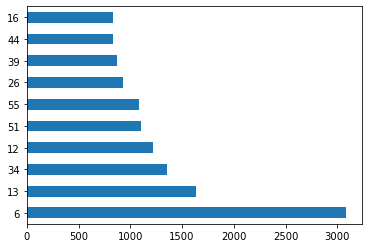

In [120]:
traffic_station_df2.fips_state_code.value_counts()[:10].plot.barh()

#### Number of Traffic Stations in each state (in desc order): 
#### 1.California, 2.Georgia, 3. New Jersey, 4. Florida, 5. Virginia, 6. Wisconsin, 7. Michigan, 8. Ohio, 9. Rhode Island, 10. Idaho.

In [383]:
# import traffic fatality dataset
traffic_fatality_df = pd.read_csv(os.getcwd()+'/input/bigquery-public-data-nhtsa_traffic_fatalities.csv')
traffic_fatality_df.head()

,fips_code,state_name,accidents,fatalities,fatalities_per_accident
0,1,Alabama,784,850,1.084184
1,2,Alaska,60,65,1.083333
2,4,Arizona,811,897,1.106042
3,5,Arkansas,491,550,1.120163
4,6,California,3123,3387,1.084534


In [386]:
# top 10 states with highest traffic accidents
accident_sorted = traffic_fatality_df.sort_values('accidents', ascending=False)
accident_sorted.head(10)

,fips_code,state_name,accidents,fatalities,fatalities_per_accident
43,48,Texas,3190,3582,1.122884
4,6,California,3123,3387,1.084534
9,12,Florida,2699,2938,1.088551
10,13,Georgia,1329,1432,1.077502
33,37,North Carolina,1275,1379,1.081569
38,42,Pennsylvania,1102,1200,1.088929
32,36,New York,1061,1136,1.070688
35,39,Ohio,1029,1110,1.078717
13,17,Illinois,914,998,1.091904
40,45,South Carolina,911,979,1.074643


In [387]:
# top 10 states with highest fatalities
fatalities_per_accident_sorted = traffic_fatality_df.sort_values('fatalities_per_accident', ascending=False)
fatalities_per_accident_sorted.head(10)

,fips_code,state_name,accidents,fatalities,fatalities_per_accident
34,38,North Dakota,111,131,1.180180
41,46,South Dakota,116,134,1.155172
45,50,Vermont,50,57,1.140000
15,19,Iowa,282,320,1.134752
27,31,Nebraska,218,246,1.128440
50,56,Wyoming,129,145,1.124031
43,48,Texas,3190,3582,1.122884
24,28,Mississippi,604,677,1.120861
3,5,Arkansas,491,550,1.120163
31,35,New Mexico,269,298,1.107807


### Insight 3:
After analysing the accidents and fatalities trends in each state, I observed that the states with high number of accidents are likely to have traffic stations installed on their roads. This proves that my hypothesis was correct and state officials are likely to place more stations in accident-prone roads. However, the number of fatalities from traffic accidents does not lead up to more traffic stations being installed in the state.

## 4 & 5. Traffic Volume Prediction in California
In the ealier analysis, I notice that California has the highest number of traffic stations installed and there was a significant difference as compared to the second highest state, Georgia. Therefore in my last analysis, I will be focusing on the state of California and deploy several machine learning models to predict the traffic volume.

#### In features selection, I wish to keep as many features as possible for a more comprehensive model learning. These features are selected as there are possible relationship to traffic volume.

In [248]:
# features selection

traffic_features = ["date", "day_of_data", "day_of_week", "direction_of_travel",
                    "fips_state_code", "lane_of_travel", "month_of_data", "station_id", "total_traffic_vol"]

station_features = ["algorithm_of_vehicle_classification", "calibration_of_weighing_system", "classification_system_for_vehicle_classification",
                    "concurrent_route_signing","direction_of_travel", "fips_county_code", "fips_state_code",
                    "functional_classification", "hpms_sample_type", "lane_of_travel", "latitude", "longitude", "method_of_data_retrieval", 
                    "method_of_traffic_volume_counting", "method_of_truck_weighing", "method_of_vehicle_classification",
                    "national_highway_system", "number_of_lanes_in_direction_indicated", "number_of_lanes_monitored_for_traffic_volume",
                    "number_of_lanes_monitored_for_truck_weight", "posted_route_signing", "primary_purpose", "type_of_sensor", 
                    "year_station_established", "station_id"]

In [390]:
# data preprocessing
new_traffic_df = traffic_df[traffic_features][traffic_df.fips_state_code==6]
new_station_df = traffic_station_df[station_features]

In [391]:
# merge traffic data with traffic station data
pred_df = pd.merge(new_traffic_df, new_station_df, on='station_id', how='left')
pred_df

,date,day_of_data,day_of_week,direction_of_travel_x,fips_state_code_x,lane_of_travel_x,month_of_data,station_id,total_traffic_vol,algorithm_of_vehicle_classification,calibration_of_weighing_system,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel_y,fips_county_code,fips_state_code_y,functional_classification,hpms_sample_type,lane_of_travel_y,latitude,longitude,method_of_data_retrieval,method_of_traffic_volume_counting,method_of_truck_weighing,method_of_vehicle_classification,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,posted_route_signing,primary_purpose,type_of_sensor,year_station_established
0,2015-06-16,16,3,3,6,0,6,077590,71842,NaN,NaN,13,1,3,37,6,1U,N,5,34.169753,118.157818,2,3,0,0,Y,5,5,0,1,P,L,97
1,2015-06-16,16,3,3,6,0,6,077590,71842,NaN,NaN,13,1,3,37,6,1U,N,2,34.169753,118.157818,2,3,0,0,Y,5,5,0,1,P,L,97
2,2015-06-16,16,3,3,6,0,6,077590,71842,NaN,NaN,13,1,7,37,6,1U,N,2,34.169753,118.157818,2,3,0,0,Y,5,5,0,1,P,L,97
3,2015-06-16,16,3,3,6,0,6,077590,71842,NaN,NaN,13,1,3,37,6,1U,N,3,34.169753,118.157818,2,3,0,0,Y,5,5,0,1,P,L,97
4,2015-06-16,16,3,3,6,0,6,077590,71842,NaN,NaN,13,1,7,37,6,1U,N,3,34.169753,118.157818,2,3,0,0,Y,5,5,0,1,P,L,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565189,2015-01-26,26,2,1,6,0,1,023090,7020,G,C,15,1,1,93,6,1R,N,4,40.716633,122.330353,2,3,5,3,Y,2,2,2,1,P,B,97
1565190,2015-01-26,26,2,1,6,0,1,023090,7020,G,C,15,1,1,93,6,1R,N,2,40.716633,122.330353,2,3,5,3,Y,2,2,2,1,P,B,97
1565191,2015-01-26,26,2,1,6,0,1,023090,7020,G,C,15,1,5,89,6,1R,N,1,40.716633,122.330353,2,3,5,3,Y,2,2,2,1,P,B,97
1565192,2015-01-26,26,2,1,6,0,1,023090,7020,G,C,15,1,1,93,6,1R,N,0,40.716633,122.330353,2,3,5,3,Y,2,2,2,1,P,B,97


In [392]:
# show columns with missing values
missing_value = pred_df.isnull().sum()
missing_value_percent = 100 * pred_df.isnull().sum()/len(pred_df)

missing_value_table = pd.concat([missing_value, missing_value_percent], axis = 1).rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

missing_value_table

,Missing Values,% of Total Values
calibration_of_weighing_system,883489,56.4
algorithm_of_vehicle_classification,697769,44.6
type_of_sensor,1328,0.1


#### The columns below are subsequently dropped due to high number of missing values, or constant value in dataframe.

In [393]:
# drop cols
pred_df = pred_df.drop(columns=["fips_state_code_x", "fips_state_code_y", "station_id"])
pred_df = pred_df.drop(columns=["method_of_traffic_volume_counting", "primary_purpose"])
pred_df = pred_df.drop(columns=["calibration_of_weighing_system", "algorithm_of_vehicle_classification"])

#drop null rows
pred_df = pred_df.dropna(axis=0, subset=['type_of_sensor'])
pred_df.shape

(1563866, 26)

In [394]:
# show columns with missing values
missing_value = pred_df.isnull().sum()
missing_value_percent = 100 * pred_df.isnull().sum()/len(pred_df)

missing_value_table = pd.concat([missing_value, missing_value_percent], axis = 1).rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

missing_value_table

,Missing Values,% of Total Values


,day_of_data,day_of_week,direction_of_travel_x,lane_of_travel_x,month_of_data,total_traffic_vol,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel_y,fips_county_code,lane_of_travel_y,latitude,longitude,method_of_data_retrieval,method_of_truck_weighing,method_of_vehicle_classification,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,posted_route_signing,year_station_established
day_of_data,1.000000,0.006014,0.001386,0.012369,0.000645,0.001024,-0.003637,0.002000,-0.001234,0.000933,-0.000209,0.001837,0.000840,-0.002047,-0.004130,-0.003778,0.002211,0.002215,-0.002771,0.001666,-0.001156
day_of_week,0.006014,1.000000,0.001229,-0.007426,-0.012464,0.040356,-0.007255,-0.000237,0.000297,0.000464,-0.001201,-0.000296,-0.001496,-0.000557,-0.009242,-0.007146,0.000056,0.000058,-0.008814,-0.000107,-0.000206
direction_of_travel_x,0.001386,0.001229,1.000000,0.027177,-0.003742,0.001224,0.032384,0.026126,0.184732,0.022687,0.023126,-0.004344,-0.004997,-0.047424,0.040767,0.032735,0.023336,0.023638,0.040657,0.028306,0.037797
lane_of_travel_x,0.012369,-0.007426,0.027177,1.000000,0.168066,-0.307056,0.435664,-0.028304,-0.002907,0.032706,0.114610,-0.081346,-0.020683,0.037728,0.551583,0.430864,0.092281,0.092101,0.550910,-0.035915,0.053570
month_of_data,0.000645,-0.012464,-0.003742,0.168066,1.000000,-0.078324,0.137058,0.017990,0.000530,0.013633,0.020317,-0.052698,-0.023794,0.004486,0.168059,0.134764,0.003473,0.003411,0.165226,0.014137,0.003102
total_traffic_vol,0.001024,0.040356,0.001224,-0.307056,-0.078324,1.000000,-0.335511,-0.242759,0.029662,-0.125786,0.263555,-0.386701,-0.246599,0.010920,-0.279224,-0.330008,0.704736,0.704710,-0.218751,-0.234910,-0.084525
classification_system_for_vehicle_classification,-0.003637,-0.007255,0.032384,0.435664,0.137058,-0.335511,1.000000,0.053649,-0.004738,0.137144,0.038076,0.000581,0.081767,0.086600,0.785362,0.988981,-0.124467,-0.124661,0.754833,0.037064,0.071376
concurrent_route_signing,0.002000,-0.000237,0.026126,-0.028304,0.017990,-0.242759,0.053649,1.000000,0.026060,0.017653,-0.138478,0.140187,0.121347,0.074483,-0.069224,0.036167,-0.343453,-0.343382,-0.102579,0.975249,0.008672
direction_of_travel_y,-0.001234,0.000297,0.184732,-0.002907,0.000530,0.029662,-0.004738,0.026060,1.000000,0.010257,0.009344,-0.038693,-0.059422,-0.048062,-0.001681,-0.000544,0.032971,0.033270,-0.005239,0.032384,0.017291
fips_county_code,0.000933,0.000464,0.022687,0.032706,0.013633,-0.125786,0.137144,0.017653,0.010257,1.000000,-0.019585,0.162703,0.208176,-0.059191,0.080524,0.113170,-0.066729,-0.067126,0.069973,-0.014776,-0.033478


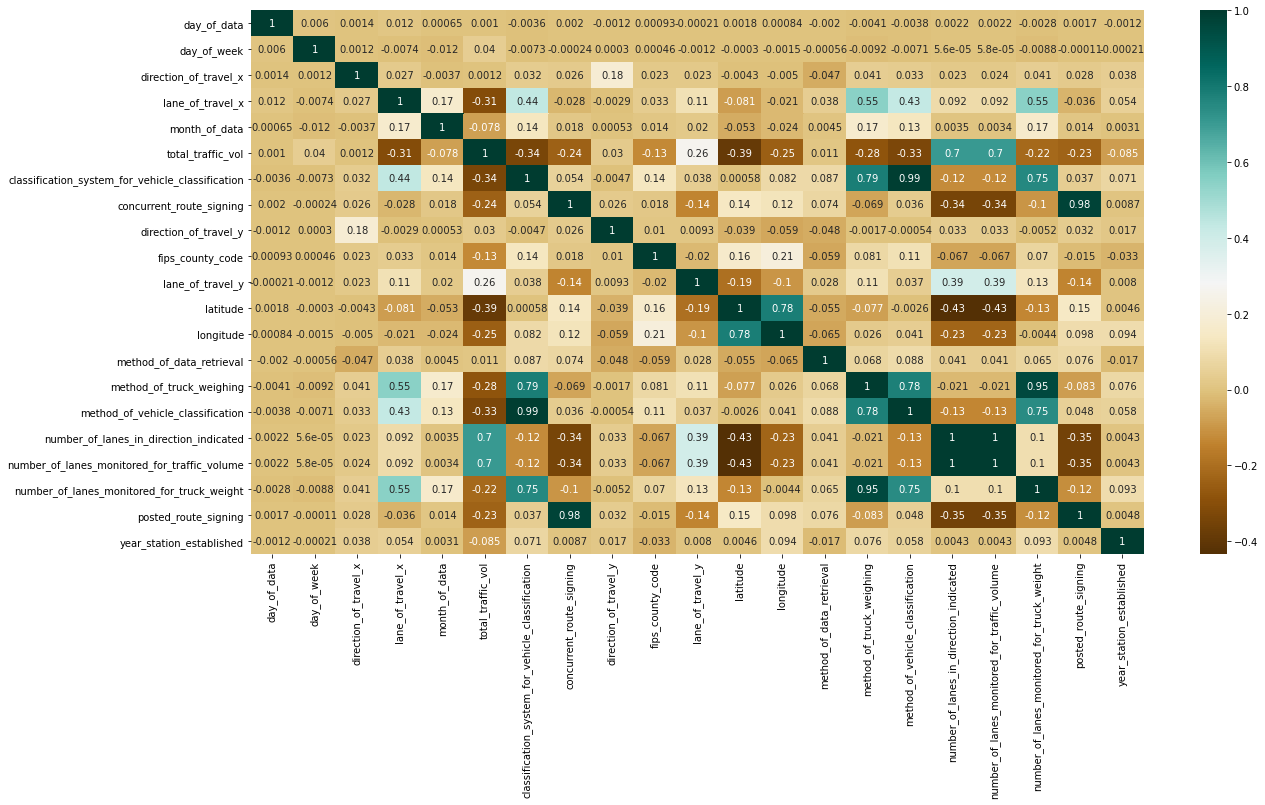

In [395]:
# plot correlation map
plt.figure(figsize=(20,10))
c= pred_df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [396]:
c.sort_values(by=['total_traffic_vol'], ascending=False).loc[:,['total_traffic_vol']]

,total_traffic_vol
total_traffic_vol,1.000000
number_of_lanes_in_direction_indicated,0.704736
number_of_lanes_monitored_for_traffic_volume,0.704710
lane_of_travel_y,0.263555
day_of_week,0.040356
direction_of_travel_y,0.029662
method_of_data_retrieval,0.010920
direction_of_travel_x,0.001224
day_of_data,0.001024
month_of_data,-0.078324


#### In features scalling, I convert categorical cols into indicator variables, followed by normalizing certain cols to ensure that the values uses a common scale.

In [397]:
# Convert categorical cols into indicator variables
pred_df = pd.get_dummies(pred_df, columns=['functional_classification', 'hpms_sample_type', 'national_highway_system', 'type_of_sensor'], drop_first=True)
pred_df

,date,day_of_data,day_of_week,direction_of_travel_x,lane_of_travel_x,month_of_data,total_traffic_vol,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel_y,fips_county_code,lane_of_travel_y,latitude,longitude,method_of_data_retrieval,method_of_truck_weighing,method_of_vehicle_classification,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,posted_route_signing,year_station_established,functional_classification_1U,functional_classification_2U,functional_classification_3R,functional_classification_3U,functional_classification_4R,functional_classification_4U,hpms_sample_type_Y,national_highway_system_Y,type_of_sensor_L,type_of_sensor_P,type_of_sensor_Q
0,2015-06-16,16,3,3,0,6,71842,13,1,3,37,5,34.169753,118.157818,2,0,0,5,5,0,1,97,1,0,0,0,0,0,0,1,1,0,0
1,2015-06-16,16,3,3,0,6,71842,13,1,3,37,2,34.169753,118.157818,2,0,0,5,5,0,1,97,1,0,0,0,0,0,0,1,1,0,0
2,2015-06-16,16,3,3,0,6,71842,13,1,7,37,2,34.169753,118.157818,2,0,0,5,5,0,1,97,1,0,0,0,0,0,0,1,1,0,0
3,2015-06-16,16,3,3,0,6,71842,13,1,3,37,3,34.169753,118.157818,2,0,0,5,5,0,1,97,1,0,0,0,0,0,0,1,1,0,0
4,2015-06-16,16,3,3,0,6,71842,13,1,7,37,3,34.169753,118.157818,2,0,0,5,5,0,1,97,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565189,2015-01-26,26,2,1,0,1,7020,15,1,1,93,4,40.716633,122.330353,2,5,3,2,2,2,1,97,0,0,0,0,0,0,0,1,0,0,0
1565190,2015-01-26,26,2,1,0,1,7020,15,1,1,93,2,40.716633,122.330353,2,5,3,2,2,2,1,97,0,0,0,0,0,0,0,1,0,0,0
1565191,2015-01-26,26,2,1,0,1,7020,15,1,5,89,1,40.716633,122.330353,2,5,3,2,2,2,1,97,0,0,0,0,0,0,0,1,0,0,0
1565192,2015-01-26,26,2,1,0,1,7020,15,1,1,93,0,40.716633,122.330353,2,5,3,2,2,2,1,97,0,0,0,0,0,0,0,1,0,0,0


In [399]:
#normalize col function
def normalizeCol(col):
    if col.max() != col.min():
        return (col - col.min())/(col.max() - col.min())
    else:
        return col

In [400]:
# normalize cols
col_MinmaxScaled = ['day_of_data', 'day_of_week', 'month_of_data', 'concurrent_route_signing', 
                    'number_of_lanes_in_direction_indicated', 'number_of_lanes_monitored_for_traffic_volume',
                    'number_of_lanes_monitored_for_truck_weight', 'posted_route_signing']

for col in col_MinmaxScaled:
    pred_df[col] = normalizeCol(pred_df[col])
pred_df.head()

,date,day_of_data,day_of_week,direction_of_travel_x,lane_of_travel_x,month_of_data,total_traffic_vol,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel_y,fips_county_code,lane_of_travel_y,latitude,longitude,method_of_data_retrieval,method_of_truck_weighing,method_of_vehicle_classification,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,posted_route_signing,year_station_established,functional_classification_1U,functional_classification_2U,functional_classification_3R,functional_classification_3U,functional_classification_4R,functional_classification_4U,hpms_sample_type_Y,national_highway_system_Y,type_of_sensor_L,type_of_sensor_P,type_of_sensor_Q
0,2015-06-16,0.5,0.333333,3,0,0.454545,71842,13,0.25,3,37,5,34.169753,118.157818,2,0,0,0.666667,0.666667,0.0,0.0,97,1,0,0,0,0,0,0,1,1,0,0
1,2015-06-16,0.5,0.333333,3,0,0.454545,71842,13,0.25,3,37,2,34.169753,118.157818,2,0,0,0.666667,0.666667,0.0,0.0,97,1,0,0,0,0,0,0,1,1,0,0
2,2015-06-16,0.5,0.333333,3,0,0.454545,71842,13,0.25,7,37,2,34.169753,118.157818,2,0,0,0.666667,0.666667,0.0,0.0,97,1,0,0,0,0,0,0,1,1,0,0
3,2015-06-16,0.5,0.333333,3,0,0.454545,71842,13,0.25,3,37,3,34.169753,118.157818,2,0,0,0.666667,0.666667,0.0,0.0,97,1,0,0,0,0,0,0,1,1,0,0
4,2015-06-16,0.5,0.333333,3,0,0.454545,71842,13,0.25,7,37,3,34.169753,118.157818,2,0,0,0.666667,0.666667,0.0,0.0,97,1,0,0,0,0,0,0,1,1,0,0


#### Train-Validate-Test split -> 80:10:10

In [401]:
# split the data in 80:10:10 for train:valid:test dataset
train_size = 0.8
valid_size= 0.1

df = pred_df
train_index = int(len(df)*train_size)

# sort the dataset by date
df.sort_values(by = 'date', ascending=True, inplace=True)

# drop "date" after sorting
df.drop(columns=["date"], inplace=True)

df_train = df[0:train_index]
df_rem = df[train_index:]

valid_index = int(len(df)*valid_size)

df_valid = df[train_index:train_index+valid_index]
df_test = df[train_index+valid_index:]

X_train, y_train = df_train.drop(columns='total_traffic_vol').copy(), df_train['total_traffic_vol'].copy()
X_valid, y_valid = df_valid.drop(columns='total_traffic_vol').copy(), df_valid['total_traffic_vol'].copy()
X_test, y_test = df_test.drop(columns='total_traffic_vol').copy(), df_test['total_traffic_vol'].copy()
        
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1251092, 31)
(1251092,)
(156386, 31)
(156386,)
(156388, 31)
(156388,)


(None, None)

#### Before training the models, I created a benchmark RMSE with simply using the median traffic volume per day of week ('day_of_week') and month ('month_of_data'). With a benchmark RMSE set, this will allow me to measure and compared the performance of other machine learning models.

In [402]:
# create benchmark RMSE using median
benchmark_median = pred_df.groupby(['day_of_week', 'month_of_data'])['total_traffic_vol'].median().reset_index()

# merge to original pred_df
benchmark_df = pd.merge(pred_df, benchmark_median, how='left', on=['day_of_week','month_of_data'])

# get benchmark rmse
benchmark_preds = benchmark_df['total_traffic_vol_y']
benchmark_labels = benchmark_df['total_traffic_vol_x']

benchmark_mse = mean_squared_error(benchmark_labels, benchmark_preds)
benchmark_rmse = np.sqrt(benchmark_mse)
print('Benchmark RMSE using median traffic vol by day and month: ', benchmark_rmse)

Benchmark RMSE using median traffic vol by day and month:  47875.34148135908


#### Linear Regression model

In [403]:
model = LinearRegression()
print('\nTraining Linear Regression model with all {} dimensions.'.format(X_train.shape[1]))

# fit the model with the training data
model.fit(X_train,y_train)

# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model : ',model.intercept_)

# predict the target on the valid dataset
predict_train = model.predict(X_train)
print('\nTraffic Volume on training data',predict_train) 

# Root Mean Squared Error on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train,predict_train))
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the validation dataset
predict_test = model.predict(X_valid)
print('\nTraffic Volume on test data',predict_test) 

# Root Mean Squared Error on testing dataset
rmse_test = np.sqrt(mean_squared_error(y_valid,predict_test))
print('\nRMSE on test dataset : ', rmse_test)


Training Linear Regression model with all 31 dimensions.

Coefficient of model : [ 1.69922653e+03  5.52918989e+03  5.24555945e+01 -1.07338626e+04
  2.24257371e+03 -2.48909329e+04 -5.69796580e+02 -3.48334166e+01
 -1.20120750e+02  2.31718669e+02 -2.97994877e+03  9.63428864e+02
  1.14986062e+03  1.44530144e+02  1.44280668e+04  2.19381851e+05
 -1.01571275e+05 -6.00974923e+04  7.44021561e+03 -1.29483599e+02
  1.24592023e+04  9.85689314e+03 -1.04188529e+04 -6.06356524e+03
 -7.29333960e+02  7.13005103e+03  2.17140488e+03  3.06734547e+03
 -3.32748115e+04 -3.05411113e+04 -5.51420040e+04]

Intercept of model :  363180.4040629503

Traffic Volume on training data [-25027.65149103  82971.94524791  83064.33025071 ...  30395.1277046
  30997.898709    30534.46137087]

RMSE on train dataset :  24341.50761923391

Traffic Volume on test data [31461.33604714 30302.74270181 44018.2080434  ... -6717.57580213
  -112.19570165 12108.09376009]

RMSE on test dataset :  25552.03376754147


#### Linear Regression with PCA

In [404]:
# reduce dimensionality of original linear regression model by half. 15, instead of 31 original dimensions.
model_pca = PCA(n_components=15, random_state=0)

new_train = model_pca.fit_transform(X_train)
new_valid  = model_pca.fit_transform(X_valid)

print('\nTraining model with {} dimensions.'.format(new_train.shape[1]))

# create object of model
model_new = LinearRegression()

# fit the model with the training data
model_new.fit(new_train,y_train)

# predict the target on the new train dataset
predict_train_pca = model_new.predict(new_train)

# accuray Score on train dataset
rmse_train_pca = np.sqrt(mean_squared_error(y_train,predict_train_pca))
print('\nRMSE on new train dataset : ', rmse_train_pca)

# predict the target on the new validation dataset
predict_test_pca = model_new.predict(new_valid)

# accuracy Score on validation dataset
rmse_test_pca = np.sqrt(mean_squared_error(y_valid,predict_test_pca))
print('\nRMSE on new test dataset : ', rmse_test_pca)


Training model with 15 dimensions.

RMSE on new train dataset :  28252.129780217903

RMSE on new test dataset :  33303.609918410046


#### Random Forest Regressor

In [405]:
model_regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)

#fit the model with training data
model_regressor.fit(X_train, y_train)

# predict the target on train dataset
predict_train_regressor = model_regressor.predict(X_train)

# accuray Score on train dataset
rmse_train_regressor = np.sqrt(mean_squared_error(y_train,predict_train_regressor))
print('RMSE on train dataset : ', rmse_train_regressor)

# predict the target on validation dataset
predict_test_regressor = model_regressor.predict(X_valid)

# accuracy Score on validation dataset
rmse_test_regressor = np.sqrt(mean_squared_error(y_valid, predict_test_regressor))
print('\nRMSE on test dataset :', rmse_test_regressor)

RMSE on train dataset :  101.91579854027363

RMSE on test dataset : 5977.450940109475


#### Random Forest Regressor with GridSearchCV

In [406]:
param_grid = {'n_estimators': [10, 30, 60]}

model_regressor_tune = RandomForestRegressor(random_state = 0)

reg_gsearch = GridSearchCV(estimator = model_regressor_tune, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

#fit the model with train dataset
reg_gsearch.fit(X_train, y_train)
print('Grid search best parameters :', reg_gsearch.best_params_)

# predict the target with train dataset
predict_train_reg_gsearch = reg_gsearch.predict(X_train)

# accuray Score on train dataset
rmse_train_reg_gsearch = np.sqrt(mean_squared_error(y_train,predict_train_reg_gsearch))
print('RMSE on train dataset : ', rmse_train_reg_gsearch)

# predict the target on validation dataset
predict_test_reg_gsearch = reg_gsearch.predict(X_valid)

# accuracy Score on validation dataset
rmse_test_reg_gsearch = np.sqrt(mean_squared_error(y_valid,predict_test_reg_gsearch))
print('RMSE on train dataset : ', rmse_test_reg_gsearch)

Grid search best parameters : {'n_estimators': 60}
RMSE on train dataset :  87.72357336830908
RMSE on train dataset :  5943.533199735362


#### XGBoost Regressor 

In [438]:
# fit and predict the target with train dataset
xgb_scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), 
                             X_train, y_train, scoring='neg_mean_squared_error')

rmse_train_xgb = (-xgb_scores)**0.5
rmse_train_xgb = rmse_train_xgb.mean()
print('RMSE on train dataset : ', rmse_train_xgb)

RMSE on train dataset :  6451.25979004667


#### Final Selected Model with lowest RMSE - Linear Regression

In [407]:
# scoring on final model
final_model = model

# predict the target on scoring dataset
predict_test_linear = final_model.predict(X_test)

# accuracy Score on scoring dataset
rmse_test_linear = np.sqrt(mean_squared_error(y_test, predict_test_linear))
print('\nRMSE on final scoring dataset :', rmse_test_linear)


RMSE on final scoring dataset : 25285.54261005912


### Final Model - Linear Regression:
After trying different machine learning models including more complex regression models such as XGBoost regressors, the linear regression model is still the model that yields the lowest RMSE result. I was able to decrease the benchmark RMSE of approx. 47875.34148135908 to the final RMSE of 25285.54261005912 on the test dataset. An improvement of nearly 50%.

#### Feature Importance Score

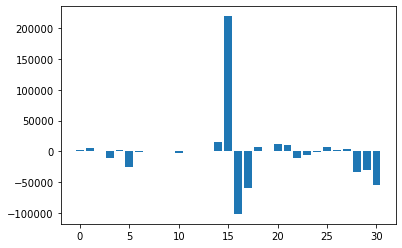

In [436]:
# get importance
importance = final_model.coef_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [448]:
# sort ranking of features
feature_impt_score = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': importance
})

feature_impt_score['Score'] = feature_impt_score['Score'].apply(lambda x: abs(x))

feature_impt_score.sort_values(by='Score', ascending=False)

,Feature,Score
15,number_of_lanes_in_direction_indicated,219381.850828
16,number_of_lanes_monitored_for_traffic_volume,101571.274655
17,number_of_lanes_monitored_for_truck_weight,60097.492349
30,type_of_sensor_Q,55142.004004
28,type_of_sensor_L,33274.811500
29,type_of_sensor_P,30541.111250
5,classification_system_for_vehicle_classification,24890.932943
14,method_of_vehicle_classification,14428.066762
20,functional_classification_1U,12459.202299
3,lane_of_travel_x,10733.862578


### Insight 4:
While the coefficients of the linear regression model is not a direct indication of the importance of each feature. It is the best alternative as an indicator and can provide the basis for a crude feature importance score. In the above table, I observed that the top three scores belongs to features related to the number of lanes. This is likely because roads with higher number of lanes such as highways are able to accomodate to high numbers of vehicles of different classes, weight and volume and will therefore boost higher traffic volume.

### Insight 5:
After further analysis of the table, I observed from the bottom scores that the the direction flow of the travelling traffic has low influence on the traffic flow. In conlusion, I believe that the features that matter more in the predictive model are based on the classification of the roads more than the flow of the traffic.

## Future Works

In data science projects, there is seldom an end to data modelling. Even if the model has been approved for deployment, there are always opportunities to continue refining the model, either with better machine learning tools or with new data sources. In this project, I believe that the final model can be further improved if the data given includes features such as weather conditions, light conditions, type of road intersections and presence of road construction etc. 

During the course of this project, I also chanced upon a comprehensive dataset by NHTSA's Fatality Analysis Reporting System, recording vehicle collision events. I feel that this dataset would be a great way to compliment the analysis that I have done above and I am excited to continue uncovering the many hypoethesis I have on my mind about traffic data. More details can be found here: https://cdan.nhtsa.gov/

#### Lastly, thank you for taking the time to evalutate my submission! :-)